In [17]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
train_input = pd.read_csv('train_inputs.csv')
val_input = pd.read_csv('val_inputs.csv')
test_input = pd.read_csv('test_inputs.csv')

print(train_input.shape, val_input.shape, test_input.shape)

(97988, 118) (17089, 118) (25710, 118)


In [4]:
train_targets = pd.read_csv('train_targets.csv')
val_targets = pd.read_csv('val_targets.csv')
test_targets = pd.read_csv('test_targets.csv')


print(train_targets.shape, val_targets.shape, test_targets.shape)

(97988, 2) (17089, 2) (25710, 2)


In [9]:
train_targets.drop('Unnamed: 0', axis=1, inplace=True)
val_targets.drop('Unnamed: 0', axis=1, inplace=True)
test_targets.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

### Training Decision Tree with max_depth=3

In [20]:
model = DecisionTreeClassifier(max_depth=3 ,random_state=42)

%%time
model.fit(train_input, train_targets)

In [23]:
model.score(train_input, train_targets)

0.8315916234640977

In [24]:
model.score(val_input, val_targets)

0.8348060155655685

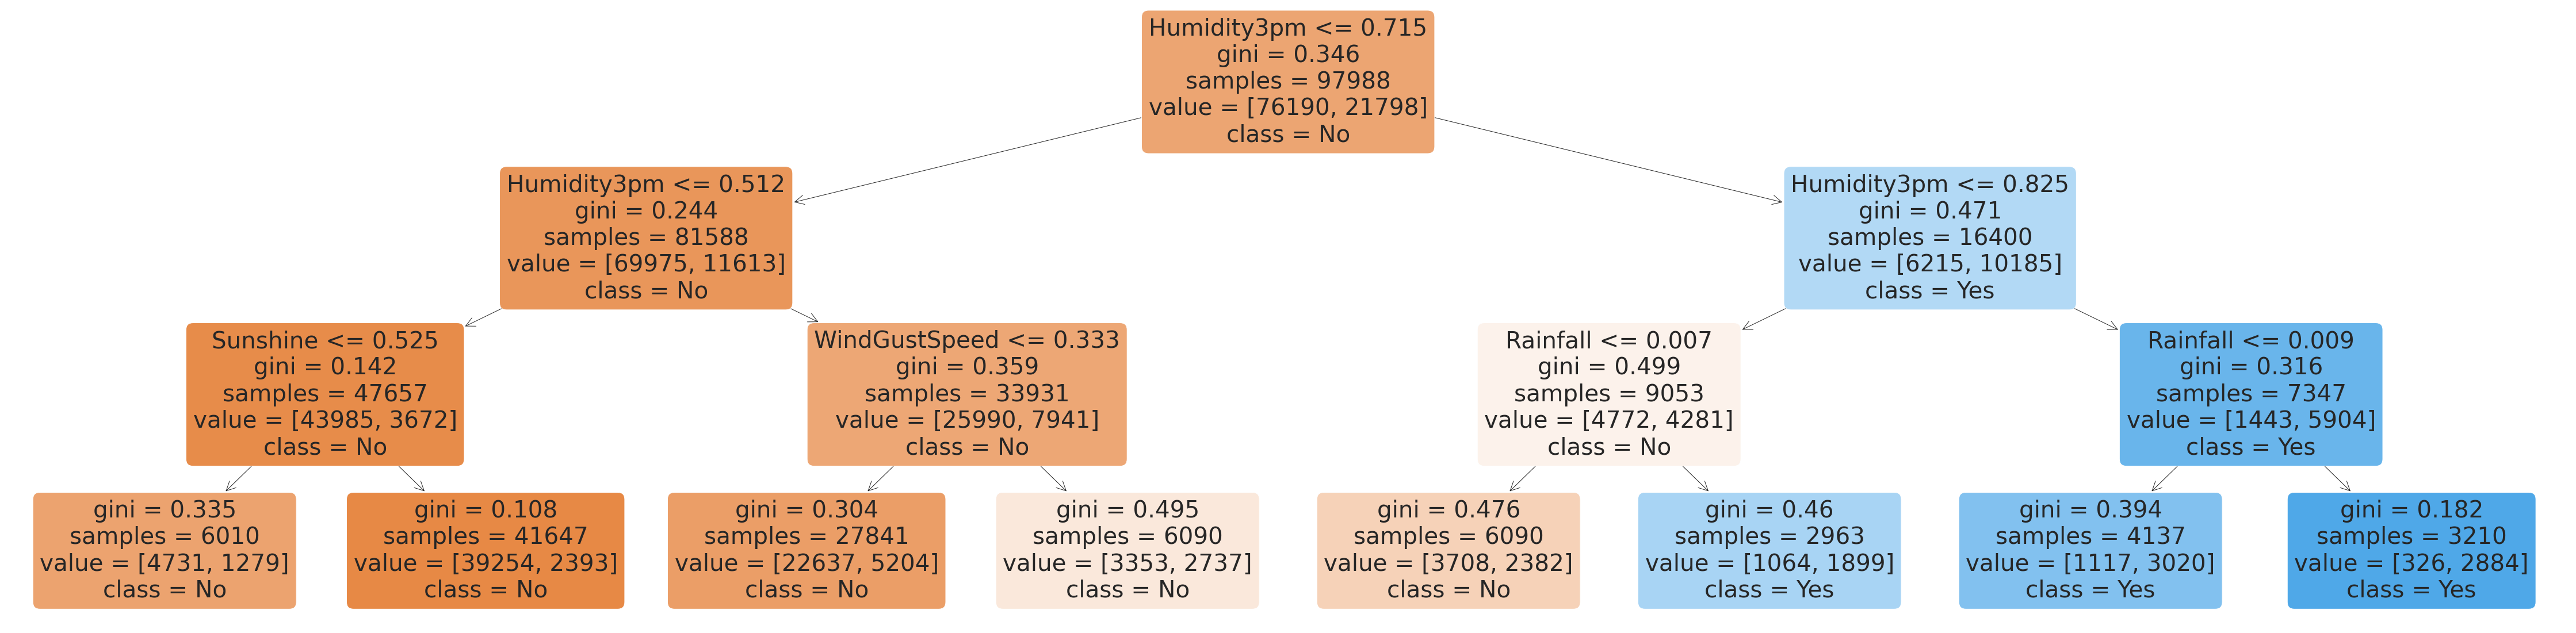

In [28]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=train_input.columns, max_depth=3, filled=True, rounded=True, class_names=model.classes_);

In [31]:
print(export_text(model, max_depth=3, feature_names=list(train_input.columns)))

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.53
|   |   |   |--- class: No
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: No
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



### Finding best max_depth
Experimenting with different depths using helper function 

In [32]:
def max_depth_find(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_input, train_targets)
    train_acc = 1 - model.score(train_input, train_targets)
    val_acc = 1 - model.score(val_input, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [33]:
%%time
error_df = pd.DataFrame([max_depth_find(md) for md in range(1, 21)])
error_df

CPU times: user 30.2 s, sys: 3.81 s, total: 34 s
Wall time: 34.1 s


,Max Depth,Training Error,Validation Error
0,1,0.181941,0.176488
1,2,0.176930,0.170695
2,3,0.168408,0.165194
3,4,0.162153,0.161624
4,5,0.157244,0.158113
5,6,0.153243,0.155890
6,7,0.149294,0.153842
7,8,0.144661,0.153256
8,9,0.138854,0.154544
9,10,0.130271,0.155890


In [48]:
error_df['Validation Error'].min()

0.15325648077710807

/tmp/ipykernel_44863/953952549.py:8: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/tmp/ipykernel_44863/953952549.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/tmp/ipykernel_44863/953952549.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Training', 'Validation')
/tmp/ipykernel_44863/953952549.py:8: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: htt

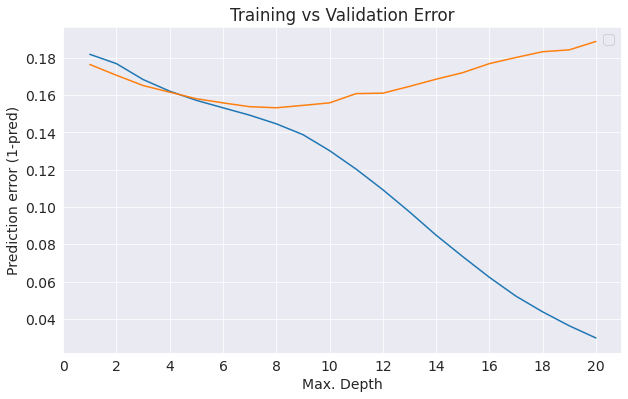

In [42]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.xlabel('Max. Depth')
plt.ylabel('Prediction error (1-pred)')
plt.title('Training vs Validation Error')
plt.xticks(range(0, 21, 2))
plt.legend('Training', 'Validation')

In [49]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(train_input, train_targets)
model.score(val_input, val_targets)

0.8461583474749839